# Conversion-fraud-in-Digital-Advertising

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv("Training Data.csv")
test_df = pd.read_csv("Test Data.csv")

In [ ]:
train_df.head()

In [ ]:
train_df.shape

In [ ]:
test_df.head()

In [ ]:
train_df.columns

In [ ]:
len(train_df.columns)

### Data Preprocessing and Feature Engineering

#### Let's fill the empty cells

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.isnull().mean()*100

#### Let's drop the features first which are having more than 40% of the NAN values 

In [ ]:
features_not_needed = []
for feature in train_df.columns:
    if train_df[feature].isnull().mean()*100 >= 40:
        features_not_needed.append(feature)

In [ ]:
features_not_needed

In [ ]:
train_df = train_df.drop(features_not_needed, axis = "columns")

In [ ]:
train_df.shape

#### Let us fill the missing values in the numerical features first

In [ ]:
def null_values(df, feature_list):
    for col in feature_list:
        print(col, "-->", df[col].isnull().mean()*100)

In [ ]:
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
numerical_features

In [ ]:
null_values(train_df, numerical_features)

In [ ]:
numerical_features_with_nan = [feature for feature in numerical_features if train_df[feature].isnull().mean() != 0]

In [ ]:
numerical_features_with_nan

In [ ]:
def plot_hist(df, feature):
    plt.hist(df[feature], color='green')
    plt.title(feature)
    plt.show()

In [ ]:
for feature in numerical_features_with_nan:
    plot_hist(train_df, feature)

##### Seems majority of the features are discrete numerical variables

##### Let's fill the missing values using random sample imputation

In [ ]:
def impute_nan(df,variable):
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [ ]:
for feature in numerical_features_with_nan:
    impute_nan(train_df, feature)

In [ ]:
train_df.shape

In [ ]:
train_df.head()

In [ ]:
null_values(train_df, numerical_features_with_nan)

#### Filling the missing values in catagorical features

In [ ]:
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O' ]

In [ ]:
categorical_features_with_nan = [feature for feature in categorical_features if train_df[feature].isnull().mean() != 0 ]
categorical_features_with_nan

In [ ]:
null_values(train_df, categorical_features_with_nan)

In [ ]:
for feature in categorical_features_with_nan:
    print(feature, "-->", len(train_df[feature].unique()))

In [ ]:
train_df['ip_cr'].value_counts()

In [ ]:
#### Seems that this feature ip_cr dosen't contain any valuable information, so let us drop it
train_df.drop(['ip_cr'], axis="columns", inplace=True)

#### let us use the random sample imputation technique to fill the missing values

In [ ]:
categorical_features_with_nan.remove('ip_cr')

In [ ]:
for feature in categorical_features_with_nan:
    impute_nan(train_df, feature)

In [ ]:
null_values(train_df, categorical_features_with_nan)

In [ ]:
train_df.isnull().mean()

In [ ]:
train_df['conversiontime_cr'].unique()

##### Now our dataset has no nan values 👍🙌

### Feature Selection using Pearson Correlation

In [ ]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(train_df.corr(),annot=True,cmap="RdYlGn")

#### From the above correlation matrix, we can infer that there are many features which are highly correlated with other features

#### Let us find and remove the highly features by using the following function

In [ ]:
#with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
list(correlation(train_df, 0.85))

In [ ]:
### Here i am choosing the thresold value as 0.85 and dropping the highly correlated features
train_df.drop(correlation(train_df, 0.85), axis="columns", inplace=True)

In [ ]:
train_df.columns

In [ ]:
train_df.shape

In [ ]:
train_df.head(10)

#### Let's check the other catogorical features

In [ ]:
train_df['clmbuserid_cr']

In [ ]:
len(train_df['clmbuserid_cr'].unique())

In [ ]:
train_df['imprid_cr']

In [ ]:
len(train_df['imprid_cr'].unique())

In [ ]:
train_df['audiences_cr']

In [ ]:
len(train_df['audiences_cr'].unique())

##### Seems these catogorical features are not having any valuable inforamtion and if we do one-hot-encoding,then we may face the issue of "Curse of Dimensionality".
##### So i will  drop those features

In [ ]:
train_df.drop(['clmbuserid_cr', 'imprid_cr', 'audiences_cr'], axis="columns", inplace=True)

In [ ]:
train_df.head()

In [ ]:
train_df.dtypes

In [ ]:
train_df.head(10)

#### There are still more catogorical features which we have to handle 

refurl_cr ,   connTypeDvimId_cr  ,   allAudiences_cr                                                     

In [ ]:
len(train_df['refurl_cr'].unique())

In [ ]:
train_df['refurl_cr']

In [ ]:
len(train_df['connTypeDimId_cr'].unique())

In [ ]:
train_df['connTypeDimId_cr']

0      264496
1      264496
2      264503
3      264496
4      264496
        ...  
960    264494
961    264496
962    264496
963    264494
964    264496
Name: connTypeDimId_cr, Length: 965, dtype: object

This feature 'connTypeDimId_cr' is a numeric catogorical feature

In [ ]:
train_df['refurl_cr'][1]

'https%3A%2F%2Fwww.cricbuzz.com%2Flive-cricket-scores%2F32278%2Find-vs-eng-4th-t20i-england-tour-of-india-2021'

In [ ]:
train_df['allAudiences_cr']

0      7dn,6hs,35g,ome,omf,l32,nqo,2ws,qqo,lo4,oos,2w...
1      h9r,35j,7dx,592,lo4,5o2,gau,75y,k8l,2ve,k8p,8k...
2      7dn,oy7,nqo,41j,2ws,lo4,oos,oou,apc,5o2,o6b,ox...
3      p1b,7dn,6hs,jyq,35g,h98,oul,nqo,2ws,lo4,p12,2w...
4                                                761,75y
                             ...                        
960    7dm,jyq,8h4,k1m,nyw,lo4,nqv,o1w,o1v,apc,o1y,o1...
961    jyq,ige,33h,41f,mss,oy7,nyw,oy9,lo4,ii1,nqx,o1...
962                                                  9nj
963                                          hkf,9nj,5xq
964                                          hkf,9nj,5xq
Name: allAudiences_cr, Length: 965, dtype: object

In [ ]:
len(train_df['allAudiences_cr'].unique())

820

#### Again We need to drop these unwanted features

In [ ]:
cols_not_needed = ['refurl_cr', 'allAudiences_cr']

In [ ]:
train_df.drop(cols_not_needed, axis="columns", inplace=True)

We need to convert the feature 'connTypeDimId_cr' from object to float

In [ ]:
train_df['connTypeDimId_cr'] = pd.to_numeric(train_df['connTypeDimId_cr'], errors='coerce')

Seems this feature 'connTypeDimId_cr' is having few missing values let's fill it

In [ ]:
train_df['connTypeDimId_cr'].isnull().mean()*100

0.7253886010362695

In [ ]:
train_df.dtypes

clientid_cr                        int64
conversiontime_cr                float64
adslotdimid_cr                     int64
algo_cr                          float64
clickbid_cr                      float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
templateid_cr                    float64
goalid_cr                          int64
time_cr                          float64
adLogType_cr                       int64
v_cr                             float64
pricingtype_cr                     int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
connTypeDimId_cr                 float64
ispDimId_cr                      float64
countryDimId_cr 

#### Seems that the feature connTypeDimId_cr has few missing values

In [ ]:
train_df[pd.to_numeric(train_df.connTypeDimId_cr,errors='coerce').isnull()==True]

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
203,29892,1.620000e+12,334766,33.0,2.79,433,5592344,53924039,1.0,76969,2923,4745.0,469,1.620000e+12,1,1.0,16,129311.0,129433.0,2942.0,2929.0,0.0,NaN,0.0,433.0,10,3670493.0,1.620000e+12,360833.0,3.0,348021.0,348009.0,False
309,25470,1.620000e+12,236059,2.0,2.79,144,5617958,53924418,10.0,15240,283,2936.0,10553,1.620000e+12,1,1.0,17,129311.0,129433.0,439.0,1815.0,0.0,NaN,136127.0,144.0,10,19311004.0,1.620000e+12,360833.0,3.0,348023.0,348007.0,False
422,2139,1.620000e+12,195755,18.0,10.00,144,5610374,53184763,2.0,7268,85,1042.0,722,1.620000e+12,1,1.0,6,129311.0,129433.0,10278.0,1808.0,0.0,NaN,136127.0,144.0,10,684436.0,1.620000e+12,359921.0,3.0,348020.0,348006.0,False
630,31365,1.620000e+12,195755,18.0,0.90,144,5616679,53930184,2.0,7268,85,1042.0,4265,1.620000e+12,1,1.0,16,129311.0,129433.0,437.0,1808.0,0.0,NaN,280429.0,144.0,10,13152725.0,1.620000e+12,360833.0,3.0,348020.0,348006.0,False
676,25470,1.620000e+12,355148,38.0,2.79,144,5614752,53924415,1.0,2316,76,2495.0,10553,1.620000e+12,1,1.0,17,129311.0,129433.0,10243.0,1803.0,0.0,NaN,280429.0,144.0,10,44955769.0,1.620000e+12,359921.0,3.0,348026.0,348008.0,False
681,31365,1.620000e+12,334762,18.0,2.79,144,5616679,53930182,1.0,76969,2923,4858.0,4265,1.620000e+12,1,1.0,16,129311.0,129433.0,437.0,1808.0,0.0,NaN,280429.0,144.0,10,13239231.0,1.620000e+12,359921.0,3.0,348020.0,348006.0,False
774,29892,1.620000e+12,355148,18.0,2.79,144,5583264,53924038,1.0,2316,76,2495.0,469,1.620000e+12,1,1.0,16,129311.0,129433.0,0.0,2518.0,0.0,NaN,147211.0,144.0,10,2146992.0,1.620000e+12,359921.0,3.0,348022.0,348007.0,False


In [ ]:
len(train_df[pd.to_numeric(train_df.connTypeDimId_cr,errors='coerce').isnull()==True])

7

In [ ]:
impute_nan(train_df, 'connTypeDimId_cr')

In [ ]:
train_df['connTypeDimId_cr'].isnull().mean()

0.0

In [ ]:
train_df.dtypes

clientid_cr                        int64
conversiontime_cr                float64
adslotdimid_cr                     int64
algo_cr                          float64
clickbid_cr                      float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
templateid_cr                    float64
goalid_cr                          int64
time_cr                          float64
adLogType_cr                       int64
v_cr                             float64
pricingtype_cr                     int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
connTypeDimId_cr                 float64
ispDimId_cr                      float64
countryDimId_cr 

In [ ]:
train_df['connTypeDimId_cr'].dtypes

dtype('float64')

### Feature Scaling

In [ ]:
cols_to_scale = [feature for feature in train_df.columns if feature != 'conversion_fraud']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

In [ ]:
train_df.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,templateid_cr,goalid_cr,time_cr,adLogType_cr,v_cr,pricingtype_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,connTypeDimId_cr,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud
0,0.873346,0.0,0.830089,0.001423,0.09359,0.0,0.944360,0.867568,1.225933e-09,0.027273,0.009414,0.642461,0.594697,0.0,1.0,0.0,0.909091,0.543669,0.661309,0.001256,0.005294,0.873648,0.222222,0.979856,0.0,0.0,8.463155e-07,1.0,0.551815,0.0,0.285714,0.4,True
1,0.873346,0.0,0.000527,0.001423,0.08982,0.0,0.944648,0.867568,1.225933e-09,0.179221,0.053143,0.000000,0.594697,0.0,1.0,0.0,0.909091,0.543669,0.661309,0.029716,0.005326,0.873648,0.222222,0.475646,0.0,0.0,1.191272e-06,1.0,0.551815,0.0,0.571429,1.0,True
2,0.873346,0.0,0.831186,0.000769,0.08982,0.0,0.944360,0.867568,1.225933e-09,0.027273,0.009414,0.643200,0.594697,0.0,1.0,0.0,0.909091,0.543669,0.661309,0.000000,0.005312,0.873648,1.000000,0.603524,0.0,0.0,1.040428e-06,1.0,0.551815,0.0,1.000000,0.0,True
3,0.873346,0.0,0.830089,0.001423,0.08982,0.0,0.944360,0.867568,1.225933e-09,0.027273,0.009414,0.642461,0.594697,0.0,1.0,0.0,0.909091,0.543669,0.661309,0.029676,0.005320,0.873648,0.222222,0.475646,0.0,0.0,1.168646e-06,1.0,0.551815,0.0,0.428571,0.4,True
4,0.345516,0.0,0.978965,0.000769,0.08982,0.0,0.997236,0.990331,1.225933e-09,0.000000,1.000000,0.000000,0.310276,0.0,1.0,0.0,1.000000,0.358580,0.660130,0.000000,0.005329,0.000000,0.222222,0.475646,0.0,0.0,1.682985e-05,1.0,0.998301,0.0,0.714286,0.4,True


In [ ]:
train_df['conversion_fraud'].value_counts()

False    834
True     131
Name: conversion_fraud, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


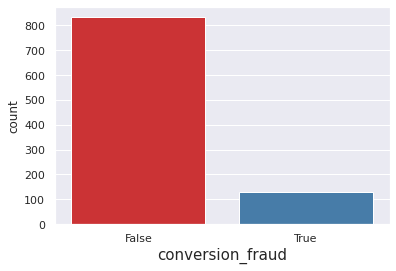

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(train_df['conversion_fraud'], palette='Set1')
plt.xlabel('conversion_fraud', size = 15)
plt.show()

#### Seems our dataset is imbalanced

In [ ]:
train_df['conversion_fraud'].replace({True:1, False:0}, inplace=True)

In [ ]:
X = train_df.drop('conversion_fraud', axis="columns")
y = train_df['conversion_fraud']

#### Balancing the dataset

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X,y = smk.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


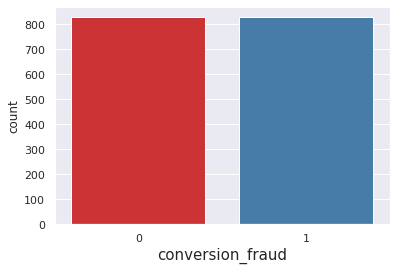

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y, palette='Set1')
plt.xlabel('conversion_fraud', size = 15)
plt.show()

##### Now our dataset is balanced

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train

array([[0.34551561, 0.        , 0.97896519, ..., 0.        , 0.71428571,
        0.76692543],
       [0.87334554, 0.        , 0.83805438, ..., 0.        , 0.27775236,
        0.3777066 ],
       [0.74383403, 0.        , 0.97896519, ..., 0.        , 0.14285714,
        0.        ],
       ...,
       [0.87334554, 0.        , 0.83008885, ..., 0.        , 0.41726749,
        0.4       ],
       [0.74383403, 0.        , 0.97896519, ..., 0.        , 0.57142857,
        1.        ],
       [0.87334554, 0.        , 0.87968694, ..., 0.        , 0.14285714,
        0.        ]])

In [ ]:
X.shape

(1658, 32)

## Hyper Parameter Tuning for Machine Learning algorithms

### Logistic Regression

In [ ]:
acc=[]
model=[]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_score = cross_val_score(LogisticRegression(), X, y, cv=10)
lr_score.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7087039065352319

In [ ]:
p=0.7087039065352319
acc.append(p)
model.append("LOGISTIC REGRESSION")


### Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(X, y)
t=clf.predict(X)
b=accuracy_score(y,t)
clf.cv_results_

In [ ]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df[['param_criterion', 'mean_test_score']]
b

In [ ]:
acc.append(b)
model.append("DECISION TREE")
acc.pop(1)

acc

In [ ]:
acc.pop(1)
acc.pop(2)
acc.pop(3)


In [ ]:
acc

In [ ]:
model=model[:3]

In [ ]:
model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[1, 5, 10, 20, 30, 40, 50,60]}, cv=10, return_train_score=False)
rf_clf.fit(X, y)
j=rf_clf.predict(X)
f=accuracy_score(y,j)
rf_clf.cv_results_

In [ ]:
rf_result_df = pd.DataFrame(rf_clf.cv_results_)
rf_result_df[['param_n_estimators', 'mean_test_score']]
f

In [ ]:
model.append("RANDOM FOREST")
acc.append(f)

### Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_clf = GridSearchCV(SVC(), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=10, return_train_score=False)
svm_clf.fit(X, y)
u=svm_clf.predict(X)
a=accuracy_score(y,u)
svm_clf.cv_results_

In [ ]:
svm_result_df = pd.DataFrame(svm_clf.cv_results_)
svm_result_df[['param_C', 'param_kernel', 'mean_test_score']]
a


In [ ]:
acc.append(a)
model.append("SVM")

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GridSearchCV(GaussianNB(),{}, cv=10, return_train_score=False)
nb_clf.fit(X, y)
e=nb_clf.predict(X)
g=accuracy_score(y,e)
nb_clf.cv_results_

In [ ]:
nb_result_df = pd.DataFrame(nb_clf.cv_results_)
x=nb_result_df[['mean_test_score']]
g

In [ ]:
acc.append(g)
model.append("NAIVE BAYES")

In [ ]:

model

In [ ]:
acc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn_clf = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1, 3, 5, 7, 9, 10, 12, 13, 14, 16, 20, 23, 25, 28, 30]}, cv=12, return_train_score=False)
knn_clf.fit(X, y)
r=knn_clf.predict(X)
rt=accuracy_score(y,r)
knn_clf.cv_results_

In [ ]:
knn_results_df = pd.DataFrame(knn_clf.cv_results_)
knn_results_df[["param_n_neighbors", "mean_test_score" ]]
rt

In [ ]:
acc.append(rt)
model.append("KNEAREST NEIGHBOUR")

In [ ]:
acc

In [ ]:
model

In [ ]:

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

#### We can infer that the performance of Random forest and Decision tree are good.So we will be using it for the final prediction

### Preprocessing the Test data

In [ ]:
test_df.head()

In [ ]:
test_record_id = test_df['record_id']

In [ ]:
cols_needed = train_df.drop('conversion_fraud', axis="columns")
cols_needed1=cols_needed.columns

In [ ]:
len(cols_needed1) 

In [ ]:
cols_needed1

In [ ]:
test_df_1 = test_df[cols_needed1]

In [ ]:
test_df_1.head()

### Filling the missing values in test data using random imputation

In [ ]:
test_df_1.isnull().mean()*100

In [ ]:
cols_with_nan = [feature for feature in test_df_1.columns if test_df_1[feature].isnull().sum() != 0]

In [ ]:
cols_with_nan

In [ ]:
for feature in cols_with_nan:
    impute_nan(test_df_1, feature)

In [ ]:
test_df_1.isnull().mean()*100

In [ ]:
test_df_1.head()

### Feature scaling in test data

In [ ]:
cols_to_scale = [feature for feature in test_df_1.columns]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_df_1[cols_to_scale] = scaler.fit_transform(test_df_1[cols_to_scale])

In [ ]:
test_df_1.head()

### Prediction

#### Using Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X, y)

In [ ]:
rf_result = rf_model.predict(test_df_1)
rf_result_df = pd.DataFrame(rf_result, columns=["conversion_fraud"])
Final_Prediction_df_rf = pd.concat([test_record_id, rf_result_df], axis="columns")
Final_Prediction_df_rf["conversion_fraud"] = Final_Prediction_df_rf["conversion_fraud"].map({1:True, 0:False})
Final_Prediction_df_rf.to_csv("result_rf.csv", index=False)

#### Using Random Forest with n_estimators=60

In [ ]:
rf1_model = RandomForestClassifier(n_estimators=60)
rf1_model.fit(X, y)

In [ ]:
rf1_result = rf1_model.predict(test_df_1)
rf1_result_df = pd.DataFrame(rf1_result, columns=["conversion_fraud"])
Final_Prediction_df_rf1 = pd.concat([test_record_id, rf1_result_df], axis="columns")
Final_Prediction_df_rf1["conversion_fraud"] = Final_Prediction_df_rf1["conversion_fraud"].map({1:True, 0:False})
Final_Prediction_df_rf1.to_csv("result_rf1.csv", index=False)

In [ ]:
A1=X_train

In [ ]:
B1=y_train

In [ ]:
A1.shape

In [ ]:
B1.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier= Sequential()

In [ ]:
classifier.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))

In [ ]:
classifier.add(Dense(units=30, kernel_initializer="uniform", activation= "relu"))

In [ ]:
classifier.add(Dense(units=1, kernel_initializer="uniform", activation= "sigmoid"))

In [ ]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Compiling the ANN
classifier.fit(A1, B1, batch_size=20, epochs=250)

In [ ]:
ym_pred=classifier.predict(X_test)

In [ ]:
ym_pred = (ym_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
cm= confusion_matrix(y_test,ym_pred)

In [ ]:
print(cm)

In [ ]:
classy= Sequential()

In [ ]:
classy.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))

In [ ]:
classy.add(Dense(units=30, kernel_initializer="uniform", activation= "relu"))

In [ ]:
classy.add(Dense(units=1, kernel_initializer="uniform", activation= "sigmoid"))

In [ ]:
classy.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Compiling the ANN
classy.fit(A1, B1, batch_size=20, epochs=50)

In [ ]:
ym2_pred=classy.predict(X_test)

In [ ]:
ym2_pred = (ym2_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
cm2= confusion_matrix(y_test,ym2_pred)

In [ ]:
print(cm2)

In [ ]:
print(ym2_pred[:10])

In [ ]:
ymlk_pred=classy.predict(test_df_1.values)

In [ ]:
ymlk_pred = (ymlk_pred > 0.5)

In [ ]:
print(ymlk_pred[:10])

In [ ]:
pred=pd.DataFrame(ymlk_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['record_id'],pred],axis=1)
datasets.columns=['record_id','conversion_fraud']
datasets.to_csv('Sample_Submission_ANN1.csv',index=False)

In [ ]:
adf=pd.read_csv('Sample_Submission_ANN1.csv')

In [ ]:
adf.isnull().sum()

In [ ]:
adf.shape

In [ ]:
from sklearn import ensemble
from sklearn import metrics

params = {'n_estimators': 5000, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(A1, B1) #trains
y_pred = clf.predict(X_test)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

In [ ]:
# List the default parameters.
print(xgb_model.get_xgb_params())

In [ ]:
# Train and evaluate.
xgb_model.fit(A1, B1, eval_metric=['error'], eval_set=[((A1,B1)),(X_test, y_test)])

In [ ]:
 xgb_model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
xgb_model=xgb_model.fit(A1, B1)
y_pred = xgb_model.predict(X_test)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('classification report')
print(metrics.classification_report(y_test, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
ypl=clf.predict(test_df_1)
ypl[:10]

In [ ]:
ypl_list = []
for element in ypl:
    if element ==1:
        ypl_list.append("TRUE")
    else:
        ypl_list.append("FALSE")

In [ ]:
ypl_list[:10]

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ypl_list)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['record_id'],pred],axis=1)
datasets.columns=['record_id','conversion_fraud']
datasets.to_csv('Sample_Submission_Gradient.csv',index=False)

In [ ]:
ympl=xgb_model.predict(test_df_1.values)
ympl[:10]

In [ ]:
ympl_list = []
for element in ympl:
    if element ==1:
        ympl_list.append('TRUE')
    else:
        ympl_list.append('FALSE')

In [ ]:
ympl_list[:10]

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ympl_list)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['record_id'],pred],axis=1)
datasets.columns=['record_id','conversion_fraud']
datasets.to_csv('Sample_Submission_XGBOOST.csv',index=False)